In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Objective**:<br>
Perform EDA and use customer segementation to neccesary insight for marketing team.

In [2]:
data=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [3]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


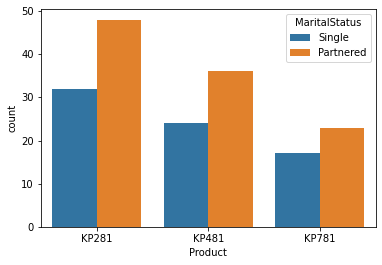

In [5]:
sns.countplot(data["Product"],hue=data["MaritalStatus"])

In [6]:
count=data.groupby(["Product","MaritalStatus"]).count()

In [7]:
print(count)

                       Age  Gender  Education  Usage  Fitness  Income  Miles
Product MaritalStatus                                                       
KP281   Partnered       48      48         48     48       48      48     48
        Single          32      32         32     32       32      32     32
KP481   Partnered       36      36         36     36       36      36     36
        Single          24      24         24     24       24      24     24
KP781   Partnered       23      23         23     23       23      23     23
        Single          17      17         17     17       17      17     17


In [8]:
product_vs_income=data.groupby(["Product"]).agg(income_avg=("Income","mean"),income_min=("Income","min"),income_max=("Income","max"))

In [9]:
price=[1500,1750,2500]


In [10]:
product_vs_income["price"]=price

In [11]:
product_vs_income

,income_avg,income_min,income_max,price
Product,,,,
KP281,46418.025,29562,68220,1500
KP481,48973.650,31836,67083,1750
KP781,75441.575,48556,104581,2500


##**product_vs_Age**

In [12]:
product_vs_Age=data.groupby(["Product"]).agg(Age_avg=("Age","mean"),Age_min=("Age","min"),Age_max=("Age","max"))

In [13]:
product_vs_Age

,Age_avg,Age_min,Age_max
Product,,,
KP281,28.55,18,50
KP481,28.90,19,48
KP781,29.10,22,48


**Product_vs_Gender**

In [14]:
product_vs_Gender=data.groupby(["Product","Gender"]).agg(count=("Gender","count"))

In [15]:
product_vs_Gender

count
Product Gender       
KP281   Female     40
        Male       40
KP481   Female     29
        Male       31
KP781   Female      7
        Male       33

**product_vs_gender_income**

In [16]:
product_vs_income_gen=data.groupby(["Product","Gender"]).agg(income_avg=("Income","mean"),income_min=("Income","min"),income_max=("Income","max"))

In [43]:
product_vs_income_gen.reset_index()


,Product,Gender,income_avg,income_min,income_max
0,KP281,Female,46020.075000,30699,67083
1,KP281,Male,46815.975000,29562,68220
2,KP481,Female,49336.448276,34110,65220
3,KP481,Male,48634.258065,31836,67083
4,KP781,Female,73633.857143,52291,95866
5,KP781,Male,75825.030303,48556,104581


##**product vs fitnesslevel**

In [18]:
product_vs_fitness=data.groupby(["Fitness"]).agg(Age_max=("Age","max"),Age_min=("Age","min"))


In [19]:
product_vs_fitness

,Age_max,Age_min
Fitness,,
1,31,23
2,46,20
3,50,19
4,44,18
5,48,22


##**Gender vs usage**

In [20]:
product_vs_gender_vs_usage=data.groupby(["Product","Gender"]).agg(Usage_mean=("Usage","mean"),Usage_min=("Usage","min"),Usage_max=("Usage","max"))

In [21]:
product_vs_gender_vs_usage

Usage_mean  Usage_min  Usage_max
Product Gender                                  
KP281   Female    2.900000          2          5
        Male      3.275000          2          5
KP481   Female    3.137931          2          5
        Male      3.000000          2          4
KP781   Female    5.000000          4          6
        Male      4.727273          3          7

##**gender vs miles**

In [22]:
Gender_vs_miles=data.groupby(["Gender"]).agg(Miles_mean=("Miles","mean"),Miles_min=("Miles","min"),Miles_max=("Miles","max"))

In [23]:
Gender_vs_miles

,Miles_mean,Miles_min,Miles_max
Gender,,,
Female,90.013158,21,280
Male,112.826923,42,360


## **product vs marital status**

In [24]:
data["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [25]:
Product_vs_martial=data.groupby(["Product","MaritalStatus"]).agg(prod_count=("Age","count")).reset_index()
Product_vs_martial["prod_count_proab"]=Product_vs_martial["prod_count"].apply(lambda x: x/sum(Product_vs_martial["prod_count"])*100)

In [26]:
Product_vs_martial

,Product,MaritalStatus,prod_count,prod_count_proab
0,KP281,Partnered,48,26.666667
1,KP281,Single,32,17.777778
2,KP481,Partnered,36,20.000000
3,KP481,Single,24,13.333333
4,KP781,Partnered,23,12.777778
5,KP781,Single,17,9.444444


##**Univarite Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


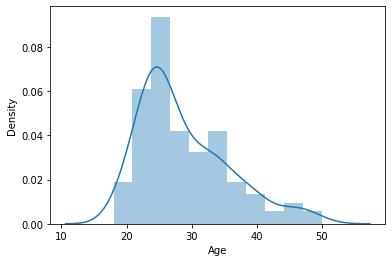

In [27]:
sns.distplot(data['Age']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


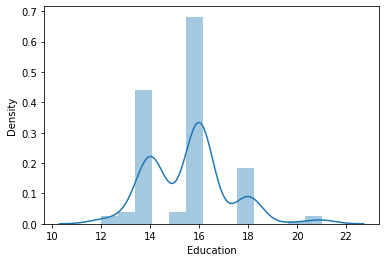

In [28]:
sns.distplot(data['Education']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


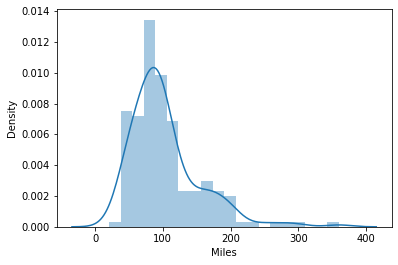

In [29]:
sns.distplot(data['Miles']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


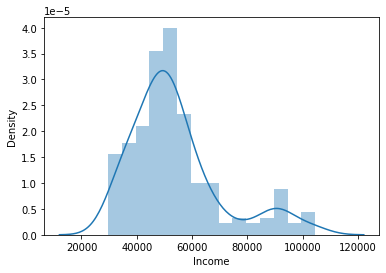

In [30]:
sns.distplot(data['Income']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


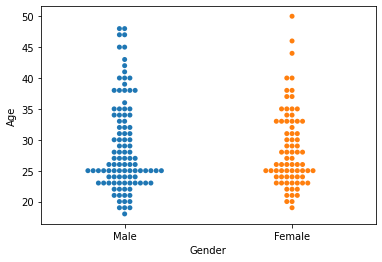

In [31]:
sns.swarmplot(data['Gender'], data['Age']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


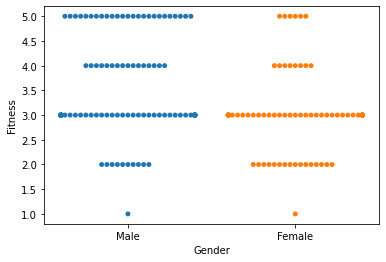

In [32]:
sns.swarmplot(data['Gender'], data['Fitness']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


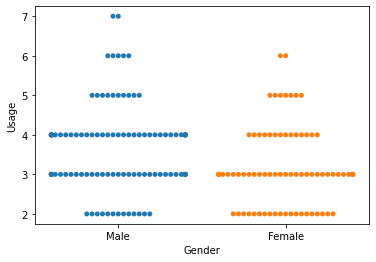

In [33]:
sns.swarmplot(data['Gender'], data['Usage'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


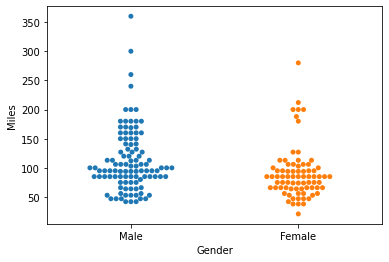

In [34]:
sns.swarmplot(data['Gender'], data['Miles'])

###**Bivarite Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


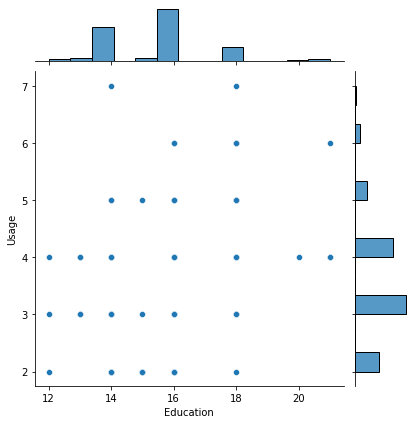

In [35]:
sns.jointplot(data['Education'], data['Usage']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


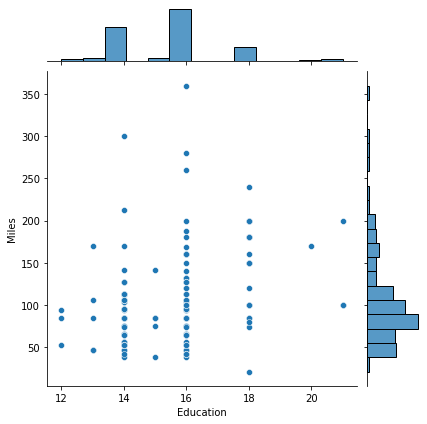

In [36]:
sns.jointplot(data['Education'], data['Miles']);

**Corelation check **

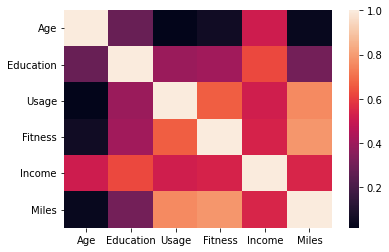

In [37]:
sns.heatmap(data.corr())

**corelation summary**<br>
1.Education is corelated income
<br>
2.Income is colrelated fitness and usage 
<br>
3.Miles is corelated usage and fitness

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


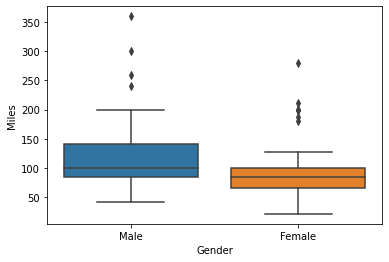

In [38]:
sns.boxplot(data['Gender'], data['Miles']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


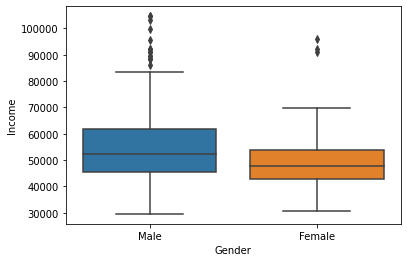

In [39]:
sns.boxplot(data['Gender'], data['Income']);

In [57]:
product_vs_income=data.groupby(["MaritalStatus"])["Product"].count()
#.agg(income_avg=("Income","mean"),income_min=("Income","min"),income_max=("Income","max"))
product_vs_income
73/180

0.40555555555555556

## **summary**


1.There are three types of product ['KP281', 'KP481', 'KP781']<br>
2.income levels of corresponding product buyers are as following:<br>
products:mean min max
<br>
**'KP281':[46418.025,	29562	,68220]**<br>
**'KP481':[48973.650,31836,	67083]**<br>
 **'KP781':[75441.575,48556,	104581]**<br> 

3.for 1500 product mean income of people is 46418 ,for 1750 on mean income is 48973 and for 2500 75411 is mean income.<br>
4.Praobilty of consumer buying and Partnered is 59.4% where as for single it is 40.6%.<br>
5.Averagly male customer are more dominanat in KP781 category as there are 7 F
33 M users <br>
6.Mean usage  and Miles of male is high as compare to female.



##**Recommendations**
1.Married male with repective mean income as shown in above table could be good leads so we can make some funnel around these population<br>
2.we can design awareness for female with repective mean income to increase there usage and may set better targets to achieve.<br>

